In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import models, layers
from tensorflow.keras.models import Model, model_from_json
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, UpSampling2D, Input
from tensorflow.keras.datasets import mnist

In [2]:
(X_train, _), (X_test, _) = mnist.load_data()

In [3]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
shape_x = 28
shape_y = 28
X_train = X_train.reshape(-1, shape_x, shape_y, 1)
X_test = X_test.reshape(-1, shape_x, shape_y, 1)

In [4]:
input_img = Input(shape=(shape_x, shape_y, 1))

# Ecoding
x = Conv2D(16, (3, 3), padding='same', activation='relu')(input_img)
x = MaxPooling2D(pool_size=(2,2), padding='same')(x)
x = Conv2D(1,(3, 3), padding='same', activation='relu')(x)
encoded = MaxPooling2D(pool_size=(2,2), padding='same')(x)
 
# Decoding
x = Conv2D(1,(3, 3), padding='same', activation='relu')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16,(3, 3), padding='same', activation='relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(1,(3, 3), padding='same')(x)

decoded = Activation('linear')(x)

In [5]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='rmsprop', loss='mean_squared_error')
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 1)         145       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 1)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 1)           10        
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 1)         0     

In [6]:
autoencoder.fit(X_train, X_train, epochs=20, batch_size=256, validation_split=0.1)

Epoch 1/20
211/211 [==============================] - 12s 55ms/step - loss: 0.0628 - val_loss: 0.0452
Epoch 2/20
211/211 [==============================] - 12s 56ms/step - loss: 0.0393 - val_loss: 0.0358
Epoch 3/20
211/211 [==============================] - 11s 52ms/step - loss: 0.0336 - val_loss: 0.0329
Epoch 4/20
211/211 [==============================] - 11s 54ms/step - loss: 0.0315 - val_loss: 0.0310
Epoch 5/20
211/211 [==============================] - 11s 53ms/step - loss: 0.0304 - val_loss: 0.0305
Epoch 6/20
211/211 [==============================] - 11s 53ms/step - loss: 0.0297 - val_loss: 0.0304
Epoch 7/20
211/211 [==============================] - 11s 54ms/step - loss: 0.0291 - val_loss: 0.0292
Epoch 8/20
211/211 [==============================] - 11s 54ms/step - loss: 0.0287 - val_loss: 0.0292
Epoch 9/20
211/211 [==============================] - 11s 54ms/step - loss: 0.0283 - val_loss: 0.0289
Epoch 10/20
211/211 [==============================] - 11s 53ms/step - loss: 0.028

In [7]:
encoder = Model(inputs=input_img, outputs=encoded)

In [8]:
encoded_imgs = encoder.predict(X_test)
decoded_imgs = autoencoder.predict(X_test)

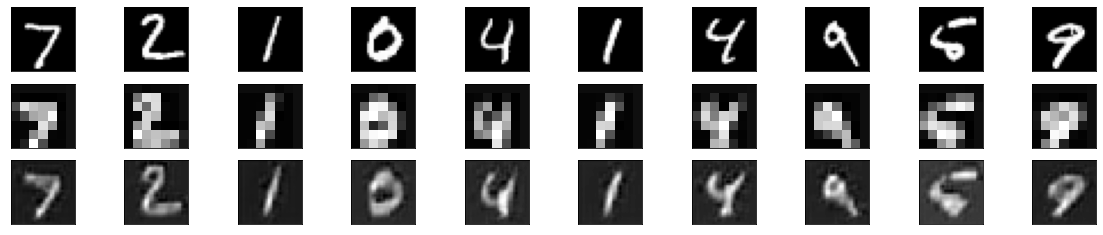

In [9]:
n = 10  
plt.figure(figsize=(20, 4))

for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Encoded images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(7, 7))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [11]:
encoded_imgs.shape

(10000, 7, 7, 1)

----